In [1]:
#As imagens normalmente tem 1(cinza) ou 3 canais(RGB), mas essa simulação só usa 2.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

# Caminho para o arquivo FITS
file_path = r"/content/drive/MyDrive/hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abre o arquivo FITS
hdulist = fits.open(file_path)

# Extrai as imagens do HDU[0] e imprime o shape
images = hdulist[0].data
print(f"Shape das imagens: {images.shape}")

# Salve todas as imagens, de ambos os filtros, na variável X
X = images
print(X.shape)
np.save("X.npy", X)
# valor esperado: (15426, 2, 75, 75)

#Extrai os Y do HDU[1] e imprime o shape
Y = hdulist[1].data
print(f"Shape dos Y: {Y.shape}")
# valor esperado: (15426,)

# Salva o array Y em um arquivo .npy
Y = np.array(Y)
print(Y.shape)
np.save("Y.npy", Y)
# valor esperado: (15426, 2, 75, 75)

hdulist.close()

Shape das imagens: (15426, 2, 75, 75)
(15426, 2, 75, 75)
Shape dos Y: (15426,)
(15426,)


[ 5270 14654  6832 10258  4568  7519  9077 11316  8460  3849  4747  1033
  8149 13656 14183 15255]


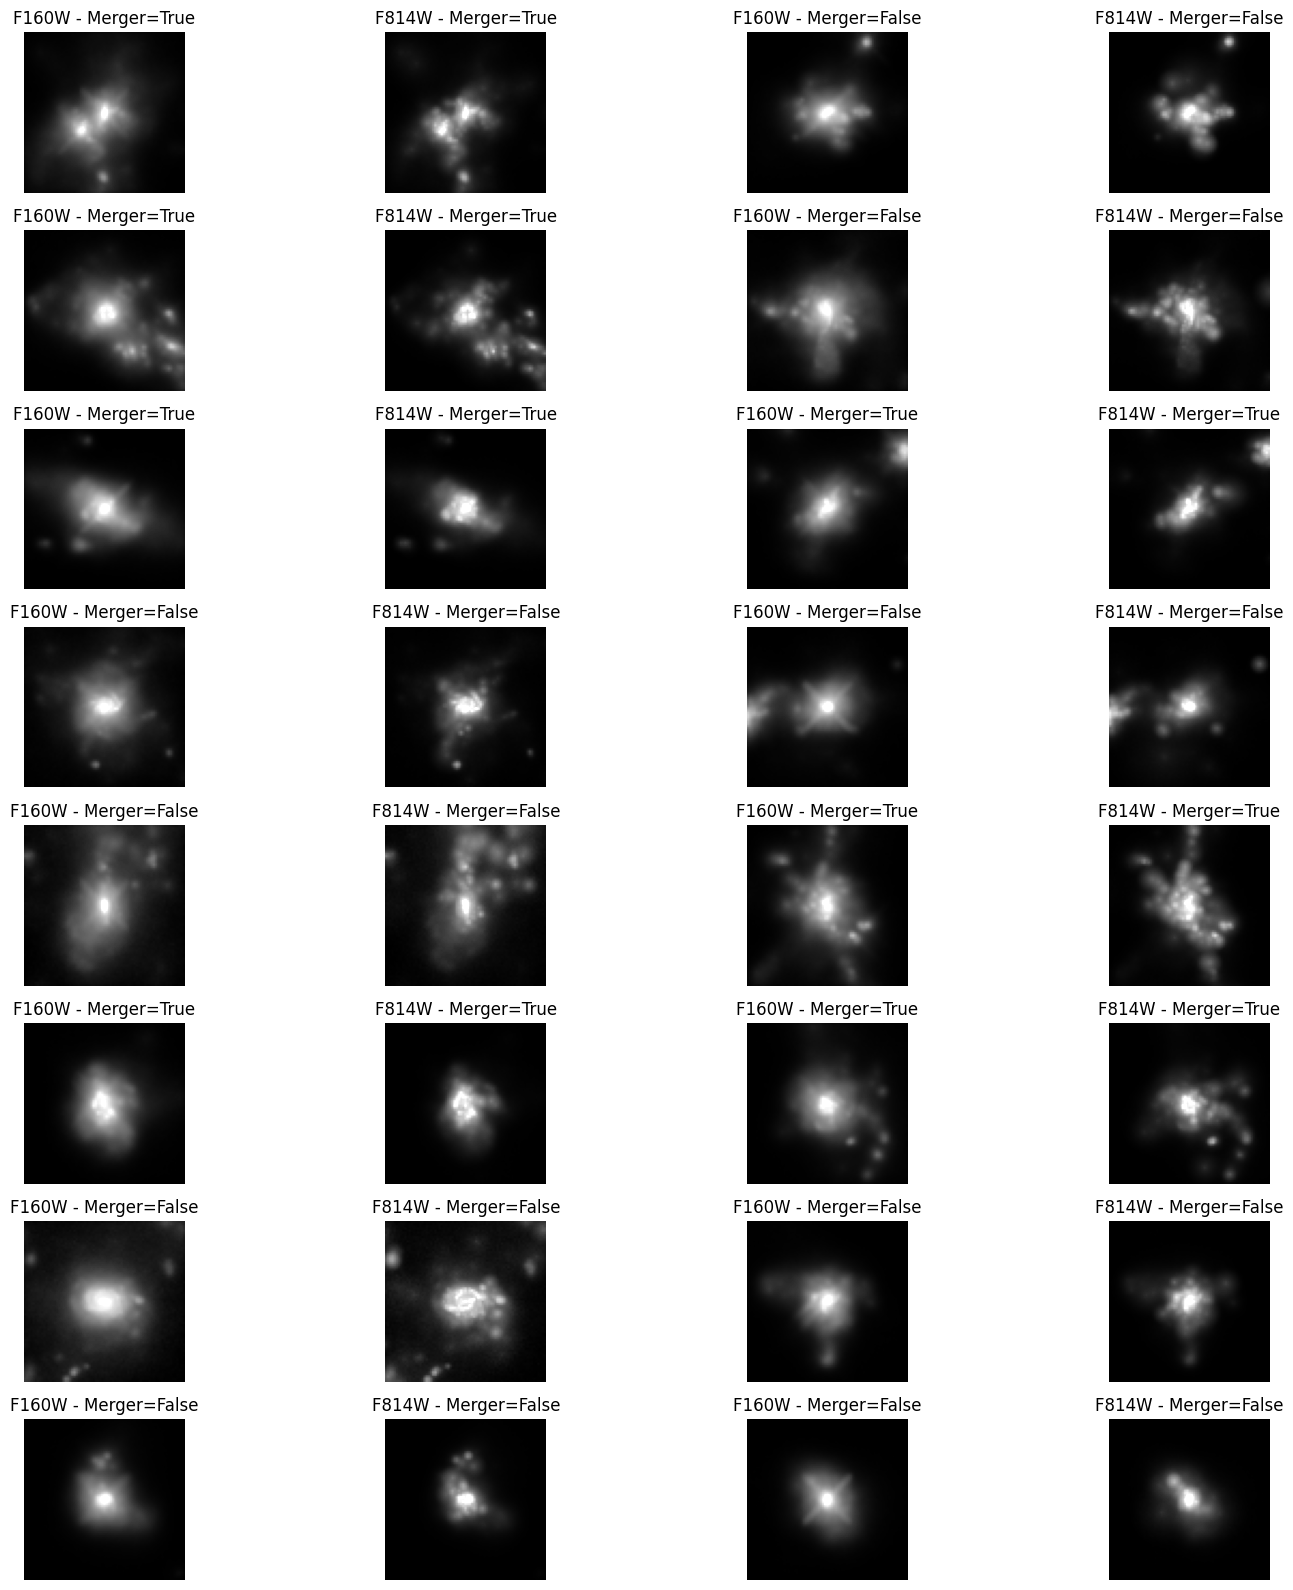

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

# Caminho do arquivo FITS
file_fits = r"/content/drive/MyDrive/hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Definir a seed para garantir a mesma seleção de imagens
# np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Selecionar 16 imagens aleatórias
example_ids = np.random.choice(hdulist[1].data.shape[0], 16)
print(example_ids)

# Pegar as imagens F160W (índice=1) e F814W (índice=0) do conjunto de dados simulado para as seleções
examples_f160w = [hdulist[0].data[j, 1, :, :] for j in example_ids]
examples_f814w = [hdulist[0].data[j, 0, :, :] for j in example_ids]

# Inicializar a figura
fig = plt.figure(figsize=(16, 16))  # Ajuste a altura para separar as imagens

# Loop pelas imagens selecionadas aleatoriamente e plotar com rótulos
for i, (image_f160w, image_f814w) in enumerate(zip(examples_f160w, examples_f814w)):
    # F160W
    ax1 = fig.add_subplot(8, 4, i * 2 + 1)  # Ajuste o layout para 8 linhas e 4 colunas
    norm1 = simple_norm(image_f160w, 'log', max_percent=99.75)
    ax1.imshow(image_f160w, aspect='equal', cmap='binary_r', norm=norm1)
    ax1.set_title('F160W - Merger=' + str(bool(hdulist[1].data[example_ids[i]][0])))
    ax1.axis('off')

    # F814W
    ax2 = fig.add_subplot(8, 4, i * 2 + 2)  # Ajuste o layout para 8 linhas e 4 colunas
    norm2 = simple_norm(image_f814w, 'log', max_percent=99.75)
    ax2.imshow(image_f814w, aspect='equal', cmap='binary_r', norm=norm2)
    ax2.set_title('F814W - Merger=' + str(bool(hdulist[1].data[example_ids[i]][0])))
    ax2.axis('off')

plt.tight_layout()
plt.show()

hdulist.close()

In [5]:
import numpy as np
from astropy.io import fits

# Caminho do arquivo FITS
file_fits = r"/content/drive/MyDrive/hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Extrair os labels
data_hdu1 = hdulist[1].data

# Criar as listas de merge e non-merge
try:
  list_of_mergers = np.where(data_hdu1 == 1.)[0]
  list_of_nonmergers = np.where(data_hdu1 == 0.)[0]
except:
  data_hdu1_vec = np.array([x[0] for x in data_hdu1])
  list_of_mergers = np.where(data_hdu1_vec == 1.)[0]
  list_of_nonmergers = np.where(data_hdu1_vec == 0.)[0]

# Salvar os arrays em arquivos .npy
np.save("mergers.npy", list_of_mergers)
np.save("nonmergers.npy", list_of_nonmergers)

# Fechar o arquivo FITS
hdulist.close()

# Imprimir os 5 primeiros elementos de cada lista e seus shapes
print("Primeiros 5 elementos de list_of_mergers:")
print(list_of_mergers[:5])
print(f"Shape de list_of_mergers: {list_of_mergers.shape}")

print("\nPrimeiros 5 elementos de list_of_nonmergers:")
print(list_of_nonmergers[:5])
print(f"Shape de list_of_nonmergers: {list_of_nonmergers.shape}")

Primeiros 5 elementos de list_of_mergers:
[0 1 2 3 4]
Shape de list_of_mergers: (8120,)

Primeiros 5 elementos de list_of_nonmergers:
[8120 8121 8122 8123 8124]
Shape de list_of_nonmergers: (7306,)


In [6]:
import numpy as np

# Carrega os dados do arquivo
X = np.load("X.npy")

# Transpõe os dados para o formato esperado pelo ImageDataGenerator
X = X.transpose(0, 2, 3, 1)
print("Após transposição:", X.shape)

# Converte os dados para o tipo float32
X = X.astype(np.float32)
print("Após conversão para float32:", X.shape)

# Normaliza os dados para o intervalo [0, 1]
X = X / np.max(X)
print("Após normalização:", np.max(X)) # saída esperada: 1.0

# Salva os dados processados em um novo arquivo
np.save("X_processed.npy", X)

Após transposição: (15426, 75, 75, 2)
Após conversão para float32: (15426, 75, 75, 2)
Após normalização: 1.0


In [7]:
# Corrige os dados Y
Y = [y[0] for y in Y]  # Extrai os valores das tuplas
Y = np.array(Y)        # Converte para um array NumPy normal
Y_int = Y.astype(int)      # Converte para inteiro e salva como Y_int.npy

# Salva os dados corrigidos
np.save("Y_int.npy", Y_int)  # Salva o array Y corrigido

print("Y_int.shape:", Y_int.shape)
print("Primeiros 2 elementos:", Y_int[:2])  # Imprime os primeiros elementos de Y_int
print("Últimos 2 elementos:", Y_int[-2:])  # Imprime os últimos elementos de Y_int

Y_int.shape: (15426,)
Primeiros 2 elementos: [1 1]
Últimos 2 elementos: [0 0]


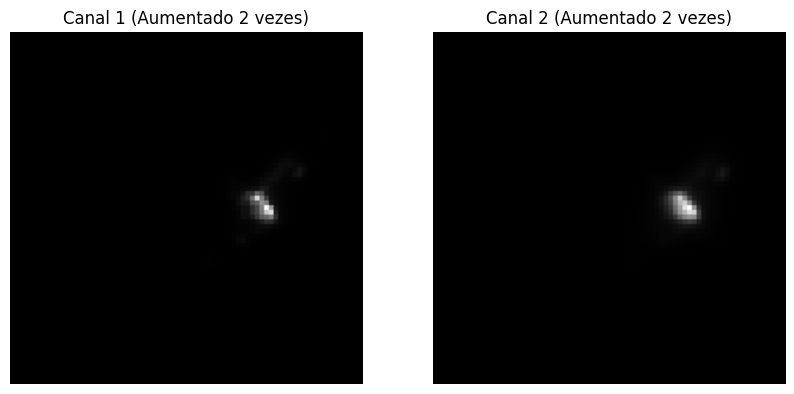

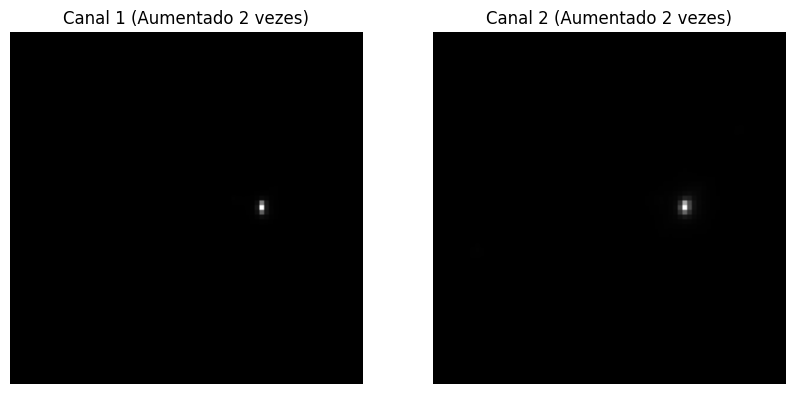

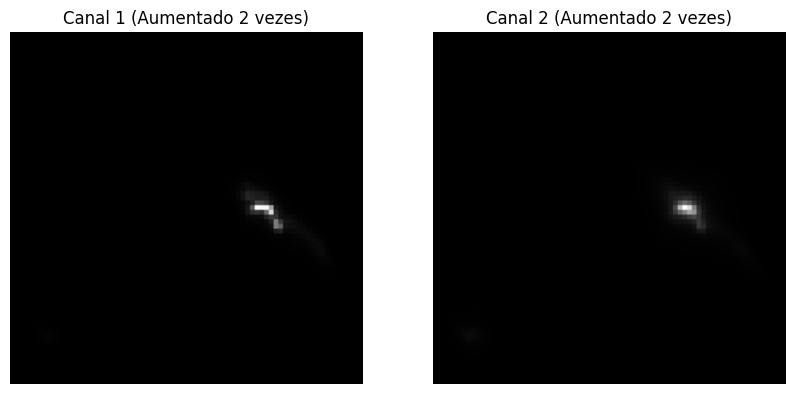

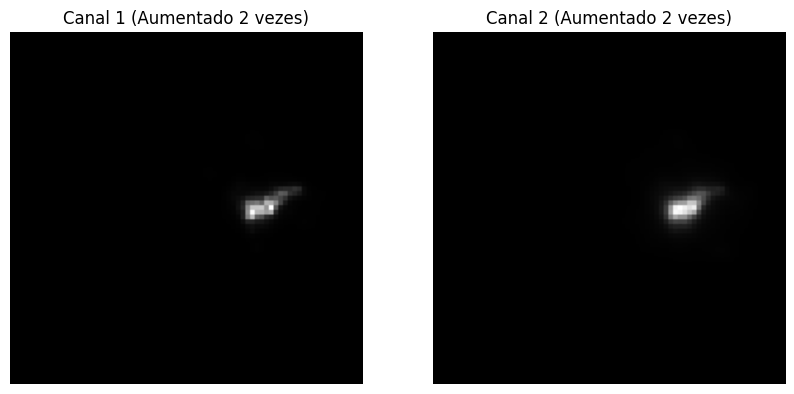

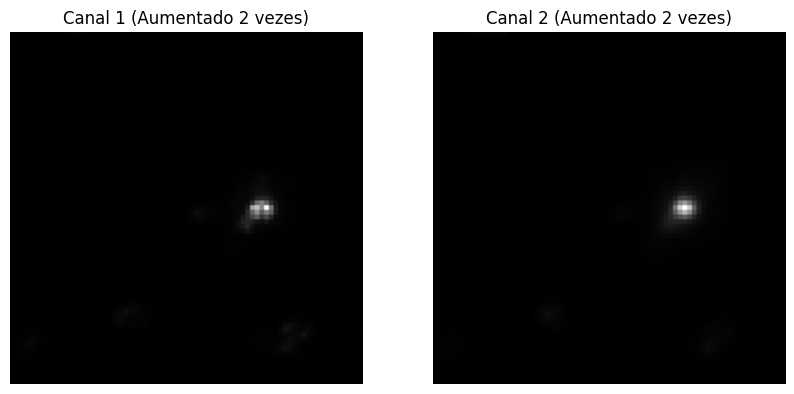

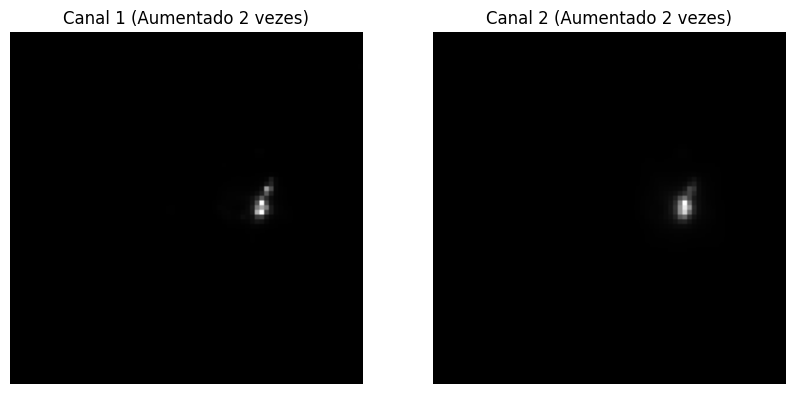

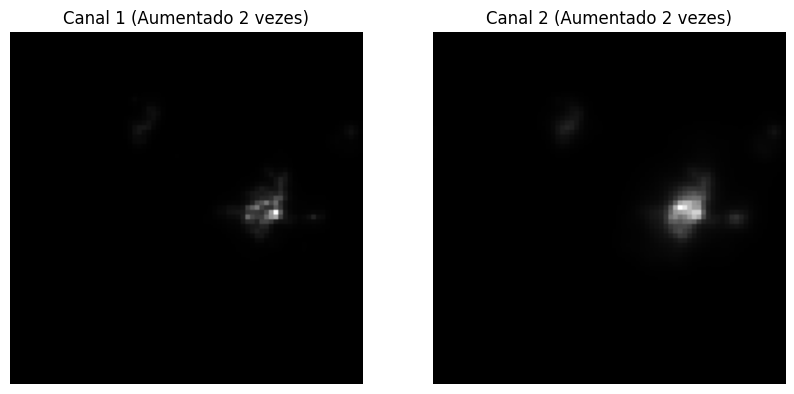

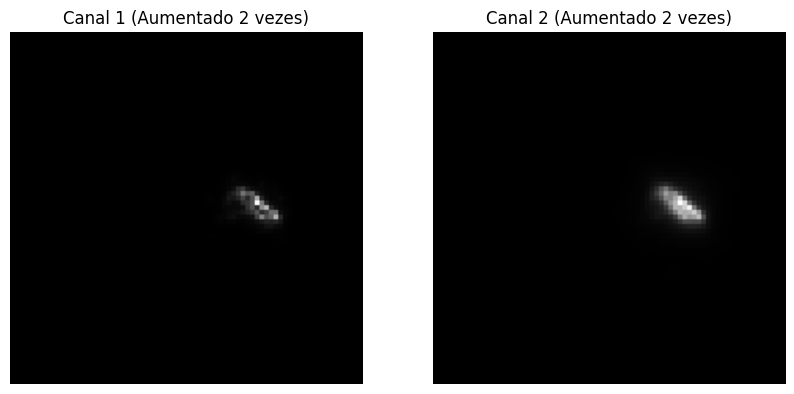

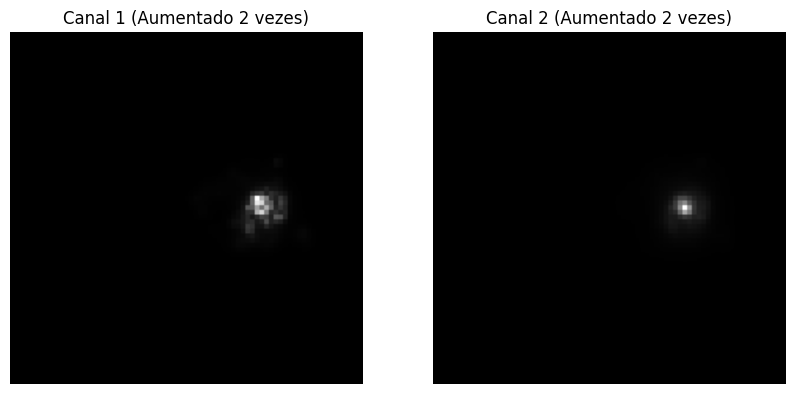

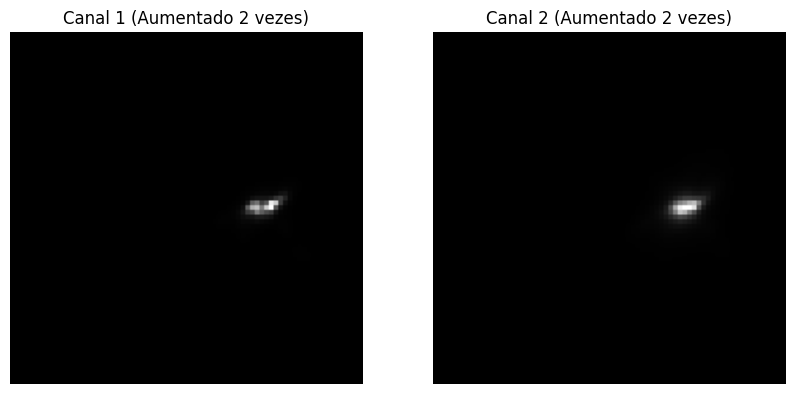

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
import astropy.io.fits as fits

# Define o tamanho do batch
batch_size = 1

# Define a função do generator para carregar os dados
def load_data_generator(file_path, batch_size=1):
    with open(file_path, "rb") as f:
        while True:
            chunk = np.frombuffer(f.read(batch_size * 75 * 75 * 2 * 4), dtype=np.float32)
            if chunk.size == 0:
                break
            # Reshape o chunk para o formato original das imagens
            chunk = chunk.reshape(-1, 75, 75, 2)
            yield chunk

# Define o número de imagens a visualizar
num_images = 10

# Carrega os rótulos de classe
Y_int = np.load("Y_int.npy")

# Seleciona imagens aleatórias
random_indices = random.sample(range(len(Y_int)), num_images)

# Define o fator de aumento do tamanho das imagens
tamanho_aumento = 2

# Itera sobre as imagens e exibe cada uma com o rótulo correspondente
for i, index in enumerate(random_indices):
    # Carrega um batch de imagens
    X_generator = load_data_generator("X_processed.npy", batch_size=1)
    for _ in range(index):
        next(X_generator)  # Pula até a imagem desejada
    X_batch = next(X_generator)

    # Seleciona uma imagem e seu rótulo
    image = X_batch[0]  # Seleciona a primeira imagem do batch
    label = Y_int[index]

    # Aumenta o tamanho das imagens
    image_canal1 = np.kron(image[..., 0], np.ones((tamanho_aumento, tamanho_aumento)))
    image_canal2 = np.kron(image[..., 1], np.ones((tamanho_aumento, tamanho_aumento)))

    # Exibe os dois canais separadamente
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura

    plt.subplot(1, 2, 1)
    plt.imshow(image_canal1, cmap="gray")  # Exibe o primeiro canal
    plt.title(f"Canal 1 (Aumentado {tamanho_aumento} vezes)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_canal2, cmap="gray")  # Exibe o segundo canal
    plt.title(f"Canal 2 (Aumentado {tamanho_aumento} vezes)")
    plt.axis('off')

    plt.show()

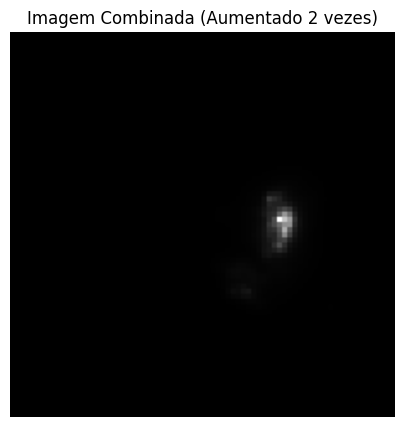

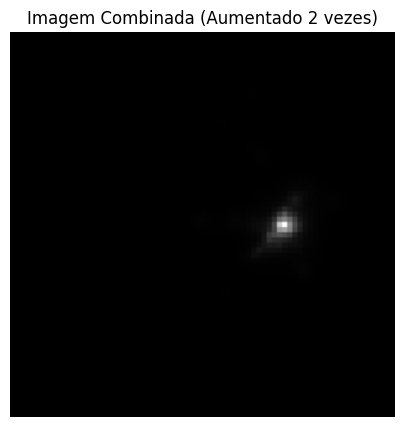

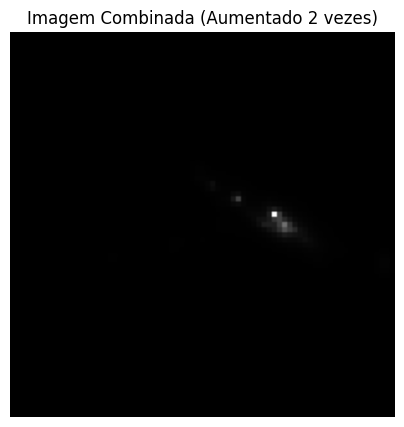

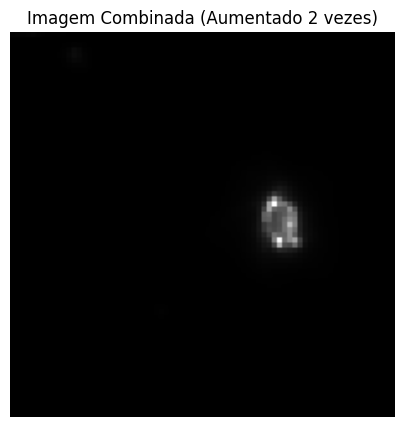

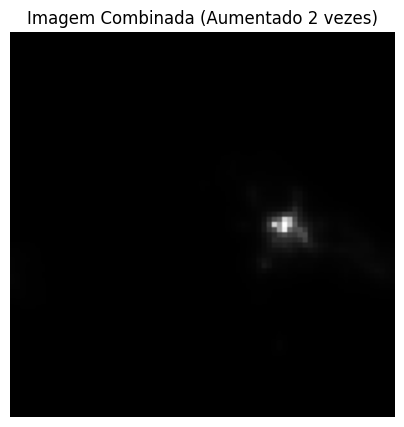

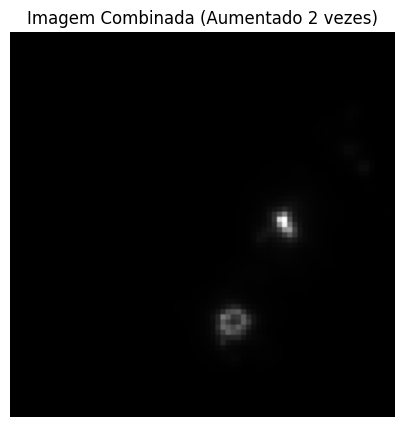

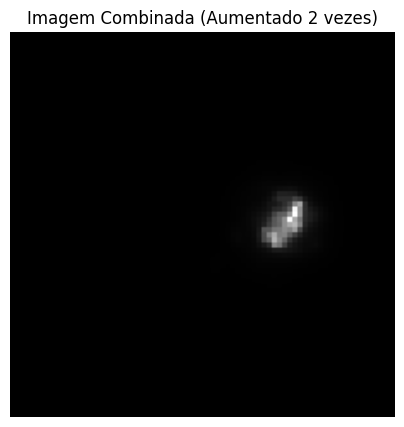

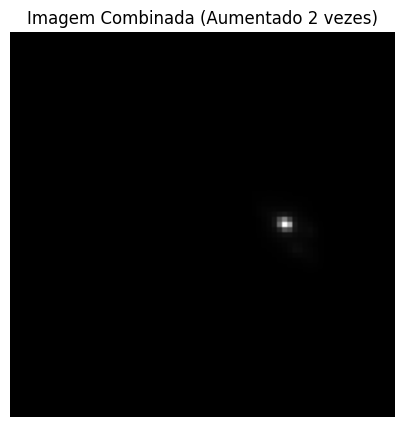

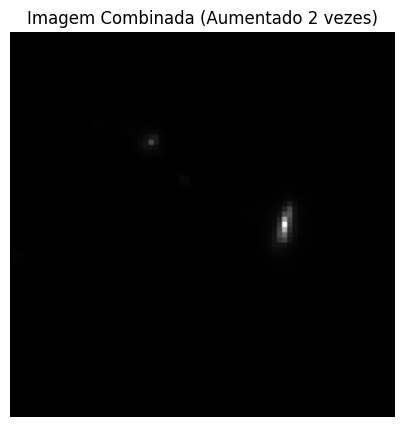

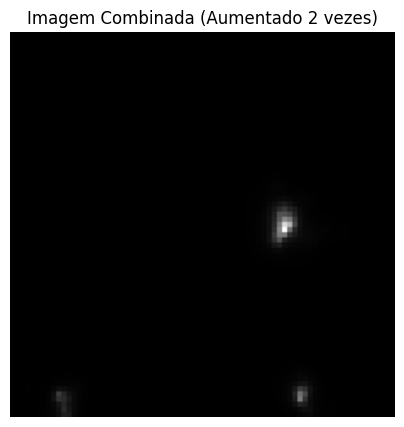

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import astropy.io.fits as fits

# Define o tamanho do batch
batch_size = 1

# Define a função do generator para carregar os dados
def load_data_generator(file_path, batch_size=1):
    with open(file_path, "rb") as f:
        while True:
            chunk = np.frombuffer(f.read(batch_size * 75 * 75 * 2 * 4), dtype=np.float32)
            if chunk.size == 0:
                break
            # Reshape o chunk para o formato original das imagens
            chunk = chunk.reshape(-1, 75, 75, 2)
            yield chunk

# Define o número de imagens a visualizar
num_images = 10

# Carrega os rótulos de classe
Y_int = np.load("Y_int.npy")

# Seleciona imagens aleatórias
random_indices = random.sample(range(len(Y_int)), num_images)

# Define o fator de aumento do tamanho das imagens
tamanho_aumento = 2

# Itera sobre as imagens e exibe cada uma com o rótulo correspondente
for i, index in enumerate(random_indices):
    # Carrega um batch de imagens
    X_generator = load_data_generator("X_processed.npy", batch_size=1)
    for _ in range(index):
        next(X_generator)  # Pula até a imagem desejada
    X_batch = next(X_generator)

    # Seleciona uma imagem e seu rótulo
    image = X_batch[0]  # Seleciona a primeira imagem do batch
    label = Y_int[index]

    # Combina os canais
    image_combinada = (image[..., 0] + image[..., 1]) / 2  # Faz a média dos dois canais

    # Aumenta o tamanho da imagem combinada
    image_combinada_aumentada = np.kron(image_combinada, np.ones((tamanho_aumento, tamanho_aumento)))

    # Exibe a imagem combinada e aumentada
    plt.figure(figsize=(5, 5))  # Define o tamanho da figura
    plt.imshow(image_combinada_aumentada, cmap="gray")  # Exibe a imagem
    plt.title(f"Imagem Combinada (Aumentado {tamanho_aumento} vezes)")
    plt.axis('off')
    plt.show()

In [35]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# Carrega os dados
X = np.load("X_processed.npy")
Y = np.load("Y_int.npy")

# Define as proporções dos conjuntos
train_ratio = 0.8  # 20% para treino
validation_ratio = 0.1  # 10% para validação
test_ratio = 0.2  # 70% para teste

# Cria um objeto StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)

# Itera sobre as divisões
for train_index, test_index in sss.split(X, Y):
    # Separa os dados em treino e teste
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

# Divide o conjunto de treino em treino e validação
sss_train = StratifiedShuffleSplit(n_splits=1, test_size=validation_ratio / (train_ratio + validation_ratio), random_state=42)
for train_index, validation_index in sss_train.split(X_train, Y_train):
    # Separa os dados em treino e validação
    X_train, X_validation = X_train[train_index], X_train[validation_index]
    Y_train, Y_validation = Y_train[train_index], Y_train[validation_index]

# Salva os dados em arquivos .npy
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_validation.npy", X_validation)
np.save("Y_validation.npy", Y_validation)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)

# Imprime o tamanho de cada conjunto
print("Tamanho do conjunto de treinamento:", X_train.shape[0])
print("Tamanho do conjunto de validação:", X_validation.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treinamento: 10968
Tamanho do conjunto de validação: 1372
Tamanho do conjunto de teste: 3086


In [36]:
# Salva os dados em arquivos .npy
print(f"X_train.shape: {X_train.shape}")
np.save("X_train.npy", X_train)
print(f"Y_train.shape: {Y_train.shape}")
np.save("Y_train.npy", Y_train)
print(f"X_validation.shape: {X_validation.shape}")
np.save("X_validation.npy", X_validation)
print(f"Y_validation.shape: {Y_validation.shape}")
np.save("Y_validation.npy", Y_validation)
print(f"X_test.shape: {X_test.shape}")
np.save("X_test.npy", X_test)
print(f"Y_test.shape: {Y_test.shape}")
np.save("Y_test.npy", Y_test)

X_train.shape: (10968, 75, 75, 2)
Y_train.shape: (10968,)
X_validation.shape: (1372, 75, 75, 2)
Y_validation.shape: (1372,)
X_test.shape: (3086, 75, 75, 2)
Y_test.shape: (3086,)


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.activations import elu # Importa a função ELU
import numpy as np
import json
import matplotlib.pyplot as plt
import random

# Importe o módulo layers
from tensorflow.keras import layers

# Define a camada de entrada (com 2 canais)
input_shape = (75, 75, 2)
input_tensor = layers.Input(shape=input_shape)

# Camadas convolucionais
x = layers.Conv2D(8, (5, 5), activation=elu, strides=(1, 1), padding='same', data_format='channels_last')(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last')(x)
x = layers.Dropout(0.1)(x) # Aumento do dropout

x = layers.Conv2D(16, (3, 3), activation=elu, strides=(1, 1), padding='same', data_format='channels_last')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last')(x)
x = layers.Dropout(0.1)(x) # Aumento do dropout

# Camadas densas
x = layers.Flatten()(x)
x = layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(x) # Aumento da regularização L2
x = layers.Dropout(0.1)(x) # Aumento do dropout
x = layers.Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(x) # Aumento da regularização L2
x = layers.Dropout(0.1)(x) # Aumento do dropout

# Camada de saída
output_tensor = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

In [61]:
# Parâmetros de compilação
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Aumento da taxa de aprendizado
metrics = ['accuracy']
loss = 'binary_crossentropy'
# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [62]:
# Caminho para salvar checkpoints
checkpoint_filepath = 'melhor_modelo_pesos.weights.keras'

In [63]:
# Callbacks
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=80, # Aumento do patience
    restore_best_weights=True
)

# Combine callbacks into a list:
callbacks = [checkpoint, early_stopping]

In [64]:
# Carrega os dados dos arquivos .npy
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")
X_validation = np.load("X_validation.npy")
Y_validation = np.load("Y_validation.npy")
X_test = np.load("X_test.npy")
Y_test = np.load("Y_test.npy")

In [65]:
# Defina as variáveis:
nb_train = X_train.shape[0]
nb_valid = X_validation.shape[0]
nb_test = X_test.shape[0]
nb_epoch = 100
nb_classes = 2
batch_size = 128
shuffle = True

In [66]:
# Embaralha os dados de treinamento (opcional, mas recomendado)
random.seed(5)  # Defina a semente para reprodutibilidade
idx = np.random.choice(len(X_train), size=len(X_train), replace=False)

# Imprima os primeiros 5 elementos de idx para verificar se está embaralhado
print("Primeiros 5 elementos de idx:", idx[:5])

# Aplique os índices embaralhados aos dados
X_train = X_train[idx]
Y_train = Y_train[idx]

# Imprima os shapes de X_train e Y_train antes e depois do embaralhamento
print("Shape de X_train antes do embaralhamento:", X_train.shape)
print("Shape de Y_train antes do embaralhamento:", Y_train.shape)

Primeiros 5 elementos de idx: [8123 7406 9808 4133 3606]
Shape de X_train antes do embaralhamento: (10968, 75, 75, 2)
Shape de Y_train antes do embaralhamento: (10968,)


In [67]:
# Treinar o modelo
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    validation_data=(X_validation, Y_validation),
    shuffle=shuffle,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5292 - loss: 1.4500
Epoch 1: val_accuracy improved from -inf to 0.47376, saving model to melhor_modelo_pesos.weights.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.5293 - loss: 1.4461 - val_accuracy: 0.4738 - val_loss: 0.8620
Epoch 2/100
81/86 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5586 - loss: 0.8117
Epoch 2: val_accuracy improved from 0.47376 to 0.54082, saving model to melhor_modelo_pesos.weights.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5591 - loss: 0.8097 - val_accuracy: 0.5408 - val_loss: 0.7573
Epoch 3/100
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5829 - loss: 0.7220
Epoch 3: val_accuracy did not improve from 0.54082
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5833 - loss: 0.7218 - val_accuracy: 0.4825 - val_loss: 0.7324
Epoch 4/100
83/86 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6168 - loss: 0.6907
Epoch 4: val_accuracy did not improve from 0.54

In [68]:
# Salvar histórico, pesos e modelo
with open("history.json", "w") as f:
    json.dump(history.history, f)

model.save_weights("pesos_modelo.weights.h5")
model.save("modelo.keras")

In [69]:
# Carregar modelo salvo
loaded_model = tf.keras.models.load_model("modelo.keras")

# Imprimir a acurácia do modelo carregado
accuracy = loaded_model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Acurácia do modelo carregado: {accuracy * 100:.2f}%")

Acurácia do modelo carregado: 73.56%


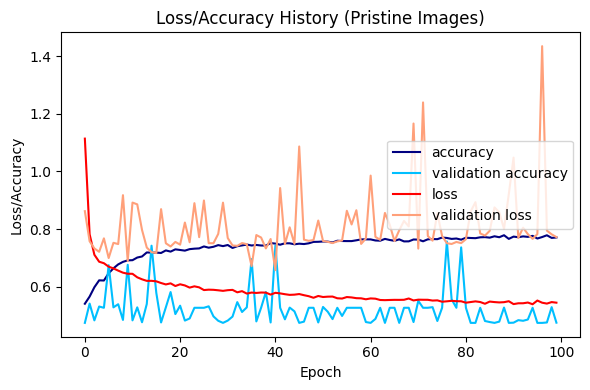

In [70]:
# Plotar histórico
with open("history.json", "r") as f:
    history_data = json.load(f)

loss = history_data['loss']
val_loss = history_data['val_loss']
acc = history_data['accuracy']
val_acc = history_data['val_accuracy']

epochs = list(range(len(loss)))
figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)

plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")

plots = plot1_loss + plot1_val_loss + plot1_lacc + plot1_val_lacc
labs = [l.get_label() for l in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History (Pristine Images)")
plt.tight_layout()
axis1.legend(loc='center right')

plt.show()

In [71]:
import json
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, brier_score_loss
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Carregar histórico
with open("history.json", "r") as f:
    history_data = json.load(f)

# predict
prob = loaded_model.predict(X_test)
pred =  (prob > 0.5).astype('int32')

# measure confusion
labels=[0, 1]
cm = confusion_matrix(Y_test, pred[:,0], labels=labels)  # Use Y_test aqui
cm = cm.astype('float')
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print("cm", cm)
print("\n cm_norm", cm_norm)

fpr, tpr, thresholds = roc_curve(Y_test, prob, pos_label=1)  # Use Y_test aqui
auc = roc_auc_score(Y_test, prob)
print("\n AUC:", auc)

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
cm [[ 923.  539.]
 [ 277. 1347.]]

 cm_norm [[0.63132695 0.36867305]
 [0.1705665  0.8294335 ]]

 AUC: 0.8172795381183748


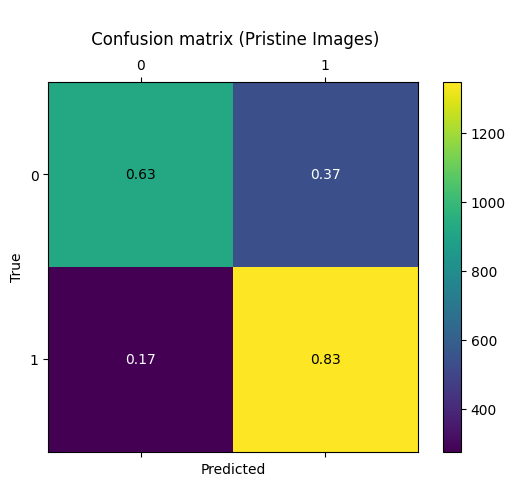

In [72]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('\n Confusion matrix (Pristine Images)', y=1.08)
fig.colorbar(cax)

# Defina as posições dos ticks
ax.set_xticks([0, 1])  # Define as posições dos ticks no eixo x
ax.set_yticks([0, 1])  # Define as posições dos ticks no eixo y

# Agora defina as labels dos ticks
ax.set_xticklabels(labels)  # Remove o elemento vazio da lista
ax.set_yticklabels(labels)  # Remove o elemento vazio da lista

plt.xlabel('Predicted')
plt.ylabel('True')
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
        ha="center", va="center",
        color="white" if cm_norm[i, j] < thresh else "black")
plt.show()

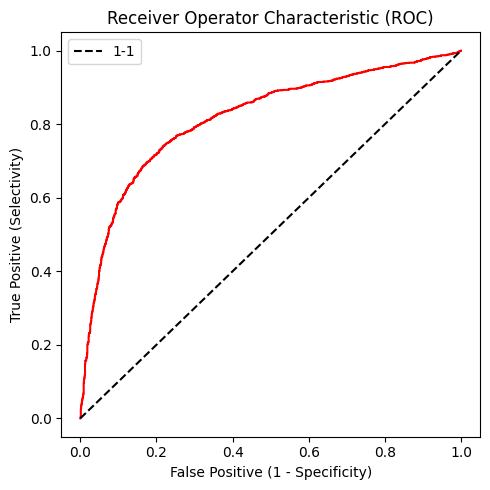

In [73]:
# ROC TEST SET
figsize=(5,5)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]
plt.plot(fpr, tpr, 'r-')
plt.plot(x_onetoone, y_onetoone, 'k--',  label="1-1")
plt.legend(loc=0)
plt.title("Receiver Operator Characteristic (ROC)")
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.tight_layout()

In [74]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, pred[:,0])  # Access the first column
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, pred[:,0])  # Access the first column
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, pred[:,0])  # Access the first column
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, pred[:,0])  # Access the first column
print('F1 score: %f' % f1)

# brier score
bs = brier_score_loss(Y_test, prob)
print('Brier score: %f' % bs)

Accuracy: 0.735580
Precision: 0.714210
Recall: 0.829433
F1 score: 0.767521
Brier score: 0.204304


In [75]:
import time
from tqdm import tqdm
import numpy as np

# Create a sample NumPy array
Y_test = np.array([1, 0, 1, 1, 0])

# Save the array to a file
np.save("Y_test.npy", Y_test)

# Later, load the array back from the file
loaded_Y_test = np.load("Y_test.npy")

# **You need to define `pred` here**
# Assuming `pred` is a 2D array
pred = np.array([[0, 1], [1, 0], [1, 1], [0, 0], [1, 0]])

# Calculate the total number of examples
total_examples = len(Y_test)

# Initialize a counter for the progress bar
progress = 0

# Loop through each example with progress bar
for i in tqdm(range(len(Y_test)), desc="Searching for matches"):
    # Check for specific combinations (TP, FP, TN, FN)
    if (Y_test[i] == 1 and pred[i, 0] == 1):
        # Update progress counter
        progress += 1

# Print the number of matches found
print(f"Found {progress} matches.")

Searching for matches: 100%|██████████| 5/5 [00:00<00:00, 3824.83it/s]

Found 1 matches.


In [76]:
#print output probabilities for the chosen TP, FP, TN, FN examples
print(prob[84],prob[1370],prob[2031],prob[3003]) # TP examples
print(prob[560],prob[1228],prob[2878],prob[3026]) # FP examples
print(prob[564],prob[1056],prob[2083],prob[3063]) # TN examples
print(prob[465],prob[1546],prob[2241],prob[3037]) # FN examples

[0.35698277] [0.55078185] [0.58567786] [0.49311468]
[0.4057537] [0.5073997] [0.31544593] [0.54608536]
[0.72153217] [0.5761327] [0.457726] [0.4956402]
[0.53851354] [0.62198514] [0.504948] [0.4987809]


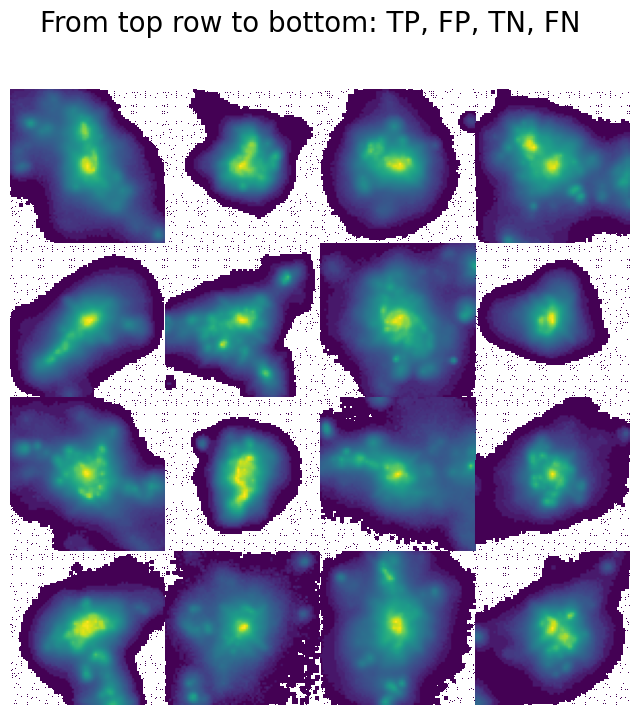

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# ... (código anterior para carregar dados, etc.)

# plot examples
tp1 = X_test[84]  # Acessa toda a imagem do exemplo 84
tp2 = X_test[1370]
tp3 = X_test[2031]
tp4 = X_test[3003]

fp1 = X_test[560]
fp2 = X_test[1228]
fp3 = X_test[2878]
fp4 = X_test[3026]

tn1 = X_test[564]
tn2 = X_test[1056]
tn3 = X_test[2083]
tn4 = X_test[3063]

fn1 = X_test[465]
fn2 = X_test[1546]
fn3 = X_test[2241]
fn4 = X_test[3037]

examples = [tp1, tp2, tp3, tp4, fp1, fp2, fp3, fp4, tn1, tn2, tn3, tn4, fn1, fn2, fn3, fn4]

# Aplica a normalização logarítmica
examples = [np.log(image + 1) for image in examples]

fig1=plt.figure(figsize=(8,8))

for i, image in enumerate(examples):
    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    # Combine os canais em uma única imagem
    combined_image = np.mean(image, axis=2)
    plt.imshow(combined_image, aspect='auto', cmap='viridis', norm=LogNorm())
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

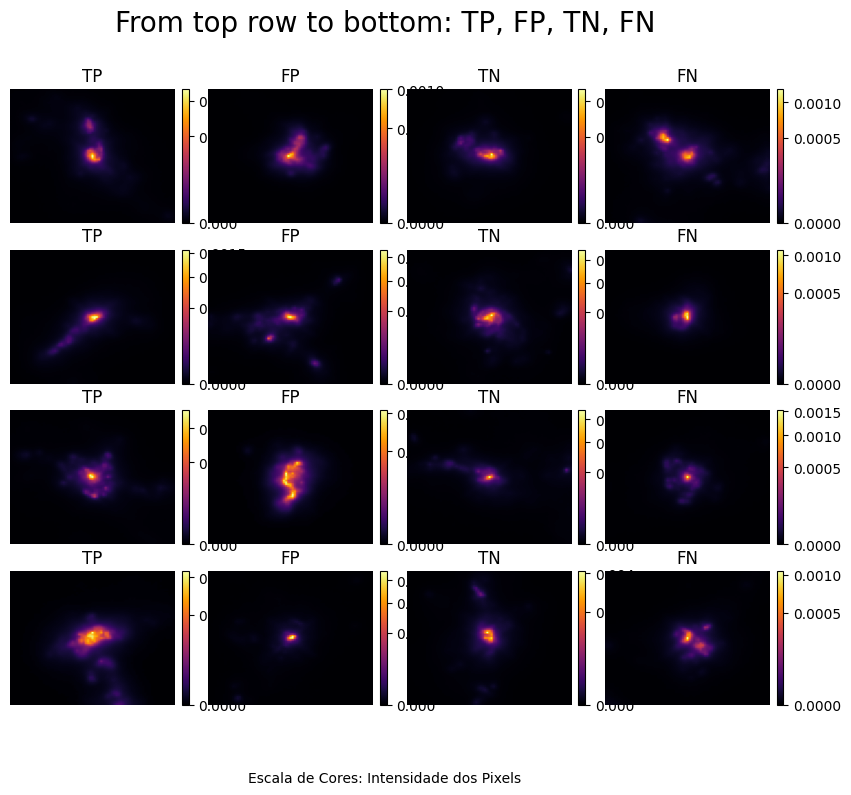

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm

fig1 = plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura

for i, image in enumerate(examples):
    # Define os rótulos
    labels = ['TP', 'FP', 'TN', 'FN']
    label = labels[i % len(labels)]

    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")

    # Combine os canais em uma única imagem
    combined_image = np.mean(image, axis=2)

    # Ajuste de Contraste:
    norm = PowerNorm(gamma=0.5)

    # Plota a imagem
    img = plt.imshow(combined_image, aspect='auto', cmap='inferno', norm=norm)
    plt.title(label, fontsize=12)  # Adiciona o rótulo

    # Adiciona uma barra de cores
    plt.colorbar(img, fraction=0.046, pad=0.04)

# Ajusta o espaçamento entre as subplots
plt.subplots_adjust(hspace=0.2, wspace=0.1)

# Adiciona a explicação da escala na parte inferior da figura
plt.figtext(
    0.5, 0.01, "Escala de Cores: Intensidade dos Pixels", ha="center", va="bottom", fontsize=10
)

plt.show()